# 0. Install and Import Dependencies

In [1]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [1]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [2]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Build Data Loading Functions

In [5]:
import gdown

In [6]:
# url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
# output = 'data.zip'
# gdown.download(url, output, quiet=False)
# gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=298daf11-d4bb-4ad8-b25b-1b4cd1b536e8
To: C:\Users\Kaivalya\Desktop\Lip read\data.zip
100%|███████████████████████████████████████████████████████████████████████████████| 423M/423M [01:42<00:00, 4.12MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [5]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [6]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [7]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [8]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [9]:
char_to_num(['n','i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11], dtype=int64)>

In [10]:
num_to_char([14,  9,  3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [11]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [12]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    #file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [13]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [14]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [15]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

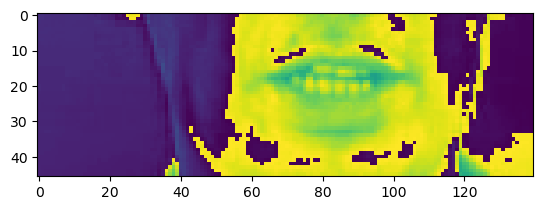

In [16]:
plt.imshow(frames[40])

In [17]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23], dtype=int64)>

In [18]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [19]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Create Data Pipeline

In [20]:
from matplotlib import pyplot as plt

In [21]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [22]:
len(test)

50

In [23]:
frames, alignments = data.as_numpy_iterator().next()

In [24]:
len(frames)

2

In [25]:
sample = data.as_numpy_iterator()

In [26]:
val = sample.next(); val[0]

array([[[[[1.3240331 ],
          [1.3240331 ],
          [1.3629754 ],
          ...,
          [9.579769  ],
          [9.579769  ],
          [9.657654  ]],

         [[1.3240331 ],
          [1.3240331 ],
          [1.3629754 ],
          ...,
          [9.034579  ],
          [9.657654  ],
          [9.579769  ]],

         [[1.3240331 ],
          [1.3240331 ],
          [1.3240331 ],
          ...,
          [9.540827  ],
          [0.03894215],
          [0.03894215]],

         ...,

         [[0.9735538 ],
          [0.9735538 ],
          [0.9346116 ],
          ...,
          [9.930248  ],
          [9.891307  ],
          [9.891307  ]],

         [[0.9735538 ],
          [0.9735538 ],
          [0.9346116 ],
          ...,
          [9.930248  ],
          [9.891307  ],
          [9.891307  ]],

         [[0.9735538 ],
          [0.9735538 ],
          [0.9346116 ],
          ...,
          [9.930248  ],
          [9.891307  ],
          [9.852365  ]]],


        [[[1.3240

In [27]:
imageio.mimsave('./animation.gif', val[0][0], fps=10)

Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. R

Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.930248260498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. R

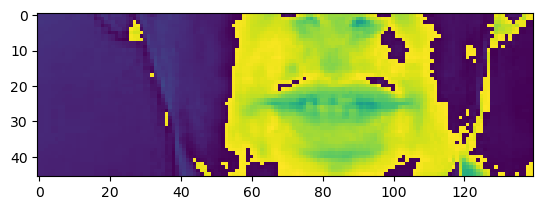

In [28]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [29]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'set blue with u five soon'>

# 3. Design the Deep Neural Network

In [30]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import legacy

In [31]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [32]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128   3584      
                             )                                   
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128   0         
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 75, 23, 70, 128)   0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                        

In [33]:
5*17*75

6375

In [34]:
yhat = model.predict(val[0])

1/1 [==============================] - 13s 13s/step


In [35]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'!!!!!!!!!!!!!!!!!!!!!!!rr!!!'>

In [36]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'!!!!!!!!!!!!!!!!!!!!!!!rr!!!'>

In [37]:
model.input_shape

(None, 75, 46, 140, 1)

In [38]:
model.output_shape

(None, 75, 41)

# 4. Setup Training Options and Train

In [39]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [40]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [41]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [42]:
optimizer = legacy.Adam(learning_rate=0.0001)

In [43]:
model.compile(optimizer=optimizer, loss=CTCLoss, metrics=['accuracy'])

In [44]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [45]:
schedule_callback = LearningRateScheduler(scheduler)

In [46]:
example_callback = ProduceExample(test)

In [52]:
model.fit(train, validation_data=test, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/100
  2/450 [..............................] - ETA: 3:03 - loss: 213.9969 


KeyboardInterrupt



# 5. Make a Prediction 

In [49]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (original): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=e3a533cb-7ab4-498f-a54b-7a4056679775
To: C:\Users\Kaivalya\Desktop\Lip read\checkpoints.zip
100%|█████████████████████████████████████████████████████████████████████████████| 94.5M/94.5M [00:14<00:00, 6.59MB/s]


['models\\checkpoint.index',
 'models\\__MACOSX/._checkpoint.index',
 'models\\checkpoint.data-00000-of-00001',
 'models\\__MACOSX/._checkpoint.data-00000-of-00001',
 'models\\checkpoint',
 'models\\__MACOSX/._checkpoint']

In [47]:
model.load_weights('models/checkpoint')

In [48]:
test_data = test.as_numpy_iterator()

In [49]:
sample = test_data.next()

In [50]:
yhat = model.predict(sample[0])

1/1 [==============================] - 10s 10s/step


In [51]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'set red by u six now'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay green at f four now'>]

In [52]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [53]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'set red by s six now'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'lay green at f four now'>]

# Test on a Video

In [54]:
sample = load_data(tf.convert_to_tensor('.\\data\\s1\\bras9a.mpg'))

In [55]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [56]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 4s 4s/step


In [57]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [58]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [59]:
import numpy as np
import tensorflow as tf

# Function to Decode Predictions
def decode_predictions(pred):
    input_length = np.ones(pred.shape[0]) * pred.shape[1]
    decoded, _ = tf.keras.backend.ctc_decode(pred, input_length, greedy=True)
    decoded = tf.keras.backend.get_value(decoded[0])  # Decoding tensor to numpy array
    return decoded

# Evaluate the Model with Detailed Debugging
def evaluate_model(model, dataset):
    predictions = []
    actuals = []

    for batch in dataset:
        X, y_true = batch
        print(f"Batch input shape: {X.shape}")
        print(f"Batch true labels shape: {y_true.shape}")

        y_pred = model.predict(X)
        print(f"Batch prediction shape: {y_pred.shape}")
        print(f"Batch prediction: {y_pred}")

        # Decode predictions
        y_pred_decoded = decode_predictions(y_pred)
        print(f"Decoded predictions shape: {len(y_pred_decoded)}")
        print(f"Decoded predictions: {y_pred_decoded}")

        for i in range(len(y_true)):
            actual = tf.strings.reduce_join([num_to_char(x) for x in y_true[i]]).numpy().decode('utf-8')
            predicted = tf.strings.reduce_join([num_to_char(x) for x in y_pred_decoded[i]]).numpy().decode('utf-8')
            actuals.append(actual)
            predictions.append(predicted)
            print(f'Actual: {actual}')
            print(f'Predicted: {predicted}')

    return predictions, actuals

# Use the test subset for evaluation
print("Evaluating model...")

# You should adjust this if `test_subset` is not defined. For example:
test_data = test.take(50)  # Adjust based on the data size (take first 50 samples)
predictions, actuals = evaluate_model(model, test_data)

# Display the results
print("Evaluation completed. Displaying results...")
for i in range(len(predictions)):
    print(f'Actual: {actuals[i]}')
    print(f'Predicted: {predictions[i]}')
    print('~' * 50)


Evaluating model...
Batch input shape: (2, 75, 46, 140, 1)
Batch true labels shape: (2, 40)
1/1 [==============================] - 8s 8s/step
Batch prediction shape: (2, 75, 41)
Batch prediction: [[[9.91082061e-07 3.65811102e-05 3.15231504e-04 ... 3.21458984e-08
   6.11557383e-08 2.68639209e-08]
  [9.05649301e-07 3.69189307e-04 6.76349600e-06 ... 6.69296796e-09
   3.86000032e-09 5.75298778e-08]
  [1.34954587e-06 9.99463975e-01 1.44380905e-07 ... 4.14684198e-09
   7.60955476e-09 6.90037254e-08]
  ...
  [9.99940276e-01 4.86265750e-10 1.58266311e-09 ... 7.24444549e-12
   8.21675172e-09 5.93508121e-05]
  [6.68895882e-05 4.47065912e-10 4.66050420e-10 ... 1.71678611e-12
   2.45749843e-09 9.99932766e-01]
  [9.99863863e-01 3.17835247e-09 7.63990204e-09 ... 1.11295154e-10
   7.30895593e-08 1.34663060e-04]]

 [[2.14988376e-07 1.31348097e-05 2.67668802e-04 ... 4.29424718e-10
   1.02176666e-04 1.63704808e-05]
  [1.80924857e-07 3.79604389e-05 4.07434356e-07 ... 1.21315753e-11
   1.88348586e-05 9.25

1/1 [==============================] - 8s 8s/step
Batch prediction shape: (2, 75, 41)
Batch prediction: [[[1.03517323e-06 3.23973582e-05 3.35696794e-04 ... 4.38583108e-08
   5.54378694e-08 2.65541136e-08]
  [1.04349419e-06 3.63577943e-04 8.53583151e-06 ... 8.76619310e-09
   4.20496615e-09 6.42487379e-08]
  [1.71364582e-06 9.99359906e-01 2.28719159e-07 ... 7.44460760e-09
   8.02391131e-09 6.70263347e-08]
  ...
  [9.99943256e-01 4.93206476e-10 1.85089788e-09 ... 9.45449795e-12
   7.57074670e-09 5.64344336e-05]
  [6.83761464e-05 4.46043147e-10 5.42923262e-10 ... 1.76588280e-12
   2.45725085e-09 9.99931216e-01]
  [9.99866128e-01 3.16442295e-09 8.58202931e-09 ... 1.03483395e-10
   7.35935970e-08 1.32438741e-04]]

 [[6.97367659e-06 3.93092312e-04 5.23950160e-02 ... 1.59072840e-07
   1.85374449e-06 3.28157853e-07]
  [1.44276328e-06 1.58584304e-03 2.38985303e-05 ... 4.21836255e-09
   4.38664749e-08 1.56996791e-07]
  [4.44966417e-06 9.61279333e-01 8.23223672e-07 ... 2.53009236e-09
   1.38971939

1/1 [==============================] - 9s 9s/step
Batch prediction shape: (2, 75, 41)
Batch prediction: [[[1.0967018e-06 3.4991008e-05 2.5674113e-04 ... 5.6972340e-08
   4.9733977e-08 2.7733023e-08]
  [1.5203256e-06 4.6723956e-04 8.9850109e-06 ... 1.6569954e-08
   4.2432124e-09 7.6540836e-08]
  [1.6454791e-06 9.9948239e-01 2.2435707e-07 ... 9.5657091e-09
   3.6481431e-09 6.1959234e-08]
  ...
  [9.9995422e-01 7.0129091e-10 1.2571783e-09 ... 5.6875143e-12
   9.7057056e-09 4.5475590e-05]
  [8.0857724e-05 6.1608096e-10 5.2904159e-10 ... 1.3299094e-12
   3.0256622e-09 9.9991870e-01]
  [9.9986267e-01 3.5100145e-09 7.4248780e-09 ... 1.0601246e-10
   7.6270119e-08 1.3589353e-04]]

 [[3.8642830e-07 7.1076408e-07 9.9904472e-01 ... 3.4683934e-09
   9.0314152e-06 5.9116310e-08]
  [6.7248811e-07 1.1088845e-05 1.6221167e-04 ... 5.7923898e-11
   3.6939468e-06 2.6962616e-07]
  [9.2898563e-07 3.4736397e-04 1.3373963e-06 ... 6.4685596e-12
   8.9742689e-06 4.4678976e-07]
  ...
  [9.9994338e-01 5.9713745e

Actual: lay red in q eight please
Predicted: lay red in q eight please
Actual: place white at x four now
Predicted: place white at x four now
Batch input shape: (2, 75, 46, 140, 1)
Batch true labels shape: (2, 40)
1/1 [==============================] - 8s 8s/step
Batch prediction shape: (2, 75, 41)
Batch prediction: [[[4.53958336e-07 6.38692939e-07 9.98901486e-01 ... 3.44143380e-09
   1.23282052e-05 6.17735196e-08]
  [6.49823676e-07 9.14210341e-06 1.34710950e-04 ... 5.62869612e-11
   4.60005185e-06 3.09432068e-07]
  [9.43889347e-07 1.51346641e-04 8.32336980e-07 ... 4.38702547e-12
   1.90093451e-05 5.82813129e-07]
  ...
  [9.99947906e-01 5.38793510e-10 1.68072090e-09 ... 9.20489206e-12
   1.12721086e-08 5.17799781e-05]
  [8.28467601e-05 4.95165242e-10 5.43994405e-10 ... 2.34590407e-12
   3.26732996e-09 9.99916673e-01]
  [9.99859452e-01 3.30419891e-09 7.97020494e-09 ... 1.12696595e-10
   8.24974435e-08 1.39034266e-04]]

 [[1.81388742e-07 1.01566056e-05 2.28585646e-04 ... 1.61115760e-10
 

Actual: lay white at l four please
Predicted: lay white at l four please
Actual: lay red by l three again
Predicted: lay red by l three again
Batch input shape: (2, 75, 46, 140, 1)
Batch true labels shape: (2, 40)
1/1 [==============================] - 9s 9s/step
Batch prediction shape: (2, 75, 41)
Batch prediction: [[[4.8904479e-07 6.7843030e-07 9.9897575e-01 ... 4.5961355e-09
   1.1769671e-05 7.3071178e-08]
  [9.8622115e-07 9.8612190e-06 1.8835478e-04 ... 8.6803752e-11
   5.3499189e-06 5.1047601e-07]
  [1.0580022e-06 1.7404476e-04 8.5051704e-07 ... 6.7370640e-12
   1.3694694e-05 7.9762333e-07]
  ...
  [9.9992716e-01 6.4279349e-10 1.4647047e-09 ... 9.8973598e-12
   9.5251682e-09 7.2462150e-05]
  [9.9752520e-05 7.5744722e-10 6.8382028e-10 ... 1.7423411e-12
   4.1170010e-09 9.9989974e-01]
  [9.9986649e-01 3.2423961e-09 7.8137612e-09 ... 1.1512198e-10
   8.0135706e-08 1.3210186e-04]]

 [[1.9339616e-07 6.8143554e-06 1.4451693e-04 ... 2.3802096e-10
   1.2428719e-04 3.3136504e-05]
  [1.6152

1/1 [==============================] - 8s 8s/step
Batch prediction shape: (2, 75, 41)
Batch prediction: [[[1.21162145e-07 8.77428756e-05 1.77761438e-04 ... 5.40853762e-09
   9.86023352e-08 3.87355357e-08]
  [6.42583586e-08 4.74148925e-04 3.39529521e-07 ... 4.84011997e-10
   4.44415571e-09 2.96051521e-08]
  [2.47593732e-07 9.98650134e-01 1.51926045e-08 ... 1.05949416e-09
   1.10355984e-07 2.59778062e-07]
  ...
  [9.99934912e-01 4.54764143e-10 1.77574433e-09 ... 1.90238485e-11
   8.99397712e-09 6.46704502e-05]
  [8.41055735e-05 4.79613405e-10 7.04334813e-10 ... 3.36755385e-12
   3.12032777e-09 9.99915481e-01]
  [9.99863148e-01 3.00948266e-09 8.72267325e-09 ... 1.40535417e-10
   7.97007118e-08 1.35268172e-04]]

 [[1.27613635e-06 4.86619720e-05 3.29695904e-04 ... 5.36894404e-08
   7.19594766e-08 3.79371947e-08]
  [6.95926531e-07 3.46117362e-04 5.01495424e-06 ... 6.33691766e-09
   2.94681102e-09 5.06407112e-08]
  [9.61173441e-07 9.99641657e-01 9.85729471e-08 ... 4.47369297e-09
   5.04514697

1/1 [==============================] - 8s 8s/step
Batch prediction shape: (2, 75, 41)
Batch prediction: [[[6.49180436e-07 1.03759203e-06 9.98354852e-01 ... 7.20974791e-09
   1.02832482e-05 1.03719088e-07]
  [1.03565060e-06 1.35444579e-05 1.51574393e-04 ... 1.12801005e-10
   4.56378211e-06 6.10248321e-07]
  [1.08783581e-06 4.21403936e-04 9.74708541e-07 ... 1.81141057e-11
   1.19219594e-05 1.29642319e-06]
  ...
  [9.99941587e-01 4.17267693e-10 1.09996856e-09 ... 7.16739255e-12
   8.85388829e-09 5.80718697e-05]
  [1.11603753e-04 5.61089175e-10 6.11537099e-10 ... 3.46381539e-12
   3.54782981e-09 9.99887943e-01]
  [9.99861836e-01 2.71268896e-09 7.80859999e-09 ... 1.57769492e-10
   7.85053800e-08 1.36668546e-04]]

 [[1.39744230e-07 1.06025082e-05 2.54894228e-04 ... 1.61687025e-10
   5.55168881e-05 1.36574918e-05]
  [1.61303475e-07 5.22620321e-05 5.48498463e-07 ... 5.86313853e-12
   1.73180670e-05 1.26016848e-05]
  [4.41022081e-08 1.04576722e-03 1.52121284e-08 ... 2.40026640e-12
   4.14760761

Actual: bin red in s two now
Predicted: bin red in s two now
Actual: set red at h six please
Predicted: set red at h six please
Batch input shape: (2, 75, 46, 140, 1)
Batch true labels shape: (2, 40)
1/1 [==============================] - 9s 9s/step
Batch prediction shape: (2, 75, 41)
Batch prediction: [[[1.72138172e-07 7.58545793e-05 2.18710207e-04 ... 8.19181345e-09
   9.41025462e-08 4.83974496e-08]
  [1.11547756e-07 5.45147865e-04 4.77877563e-07 ... 7.60622121e-10
   4.66016647e-09 4.36303544e-08]
  [3.43399165e-07 9.98563230e-01 2.87994659e-08 ... 1.20732535e-09
   8.80486581e-08 2.70036765e-07]
  ...
  [9.99947309e-01 6.13650963e-10 1.25629940e-09 ... 1.46592599e-11
   8.17109580e-09 5.23503586e-05]
  [8.24575618e-05 5.67322411e-10 6.00013594e-10 ... 2.51676956e-12
   2.66606204e-09 9.99917030e-01]
  [9.99866009e-01 3.27498184e-09 7.52536167e-09 ... 1.29491626e-10
   7.30852605e-08 1.32588742e-04]]

 [[3.65512449e-07 4.94034396e-07 9.99038815e-01 ... 3.69908415e-09
   7.84603617e-

Actual: bin green in a four please
Predicted: bin green in a four please
Batch input shape: (2, 75, 46, 140, 1)
Batch true labels shape: (2, 40)
1/1 [==============================] - 8s 8s/step
Batch prediction shape: (2, 75, 41)
Batch prediction: [[[4.0981951e-07 8.8225283e-07 9.9888879e-01 ... 4.3301918e-09
   1.2354636e-05 7.1824154e-08]
  [5.0456538e-07 1.0255405e-05 1.0959586e-04 ... 4.3850104e-11
   4.6243163e-06 2.9562688e-07]
  [9.1837592e-07 2.6559448e-04 7.4319456e-07 ... 5.9666204e-12
   3.6555601e-05 1.1080614e-06]
  ...
  [9.9994588e-01 4.9648952e-10 1.2283031e-09 ... 1.1709477e-11
   8.3571221e-09 5.3818778e-05]
  [8.0959959e-05 5.0670956e-10 5.5388327e-10 ... 2.5828140e-12
   2.8162437e-09 9.9991858e-01]
  [9.9986362e-01 3.0956662e-09 7.7137265e-09 ... 1.4040447e-10
   7.4676962e-08 1.3478714e-04]]

 [[1.3100021e-06 3.3391119e-05 2.8845717e-04 ... 7.7710780e-08
   5.8946632e-08 4.1967581e-08]
  [1.5513673e-06 4.2346551e-04 9.7799712e-06 ... 2.4306502e-08
   4.4034447e-0

1/1 [==============================] - 8s 8s/step
Batch prediction shape: (2, 75, 41)
Batch prediction: [[[4.2668017e-07 5.7320358e-07 9.9887389e-01 ... 3.8696002e-09
   5.2382434e-06 5.4765739e-08]
  [9.7007535e-07 1.4090540e-05 3.7181666e-04 ... 9.1775969e-11
   4.6921705e-06 6.5665694e-07]
  [1.2007731e-06 4.4344628e-04 3.1299628e-06 ... 1.0301041e-11
   1.2350823e-05 8.7556191e-07]
  ...
  [9.9995363e-01 3.6620926e-10 1.6466793e-09 ... 4.7723396e-12
   7.3976900e-09 4.6108911e-05]
  [8.3867308e-05 4.8570875e-10 5.3976462e-10 ... 1.3219467e-12
   2.7135181e-09 9.9991572e-01]
  [9.9987042e-01 2.8585139e-09 8.4517540e-09 ... 9.1203191e-11
   7.0488433e-08 1.2825239e-04]]

 [[1.1234282e-06 3.1750580e-05 2.6862888e-04 ... 4.3509012e-08
   5.4141026e-08 3.1029440e-08]
  [1.4220268e-06 3.9702744e-04 7.3543124e-06 ... 1.0855858e-08
   4.0878940e-09 7.7771524e-08]
  [1.6244943e-06 9.9932468e-01 1.5322669e-07 ... 6.3873005e-09
   6.5680452e-09 6.6641427e-08]
  ...
  [9.9995494e-01 4.1090123e

1/1 [==============================] - 8s 8s/step


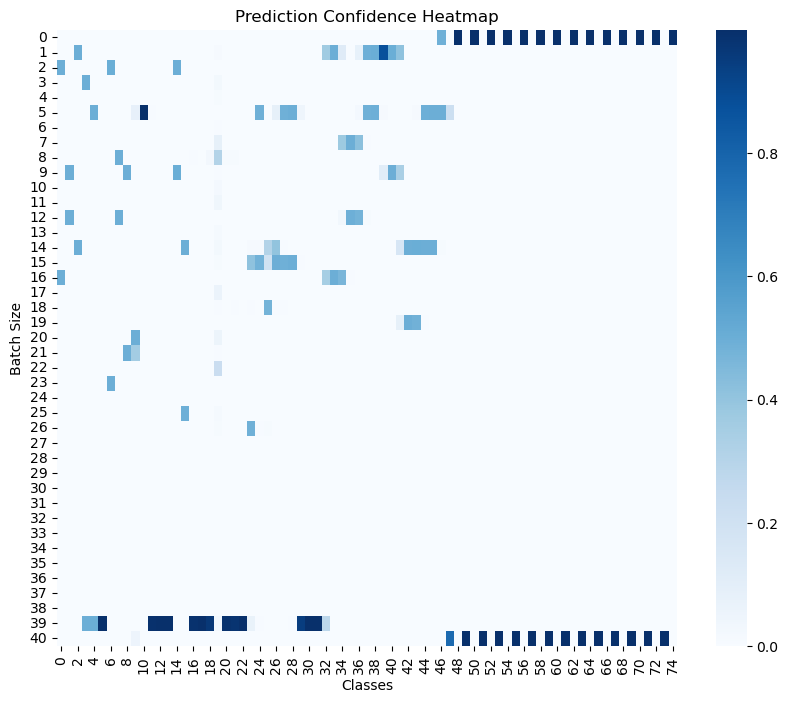

In [60]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of data from the test set (use 'test' instead of 'test_subset')
for batch in test.take(1):  # Use 'test' dataset instead of 'test_subset'
    X, y_true = batch
    pred = model.predict(X)

# Function to plot the prediction confidence heatmap
def plot_prediction_confidence(pred):
    # Average the prediction scores across time steps (axis=1)
    # This gives us a 2D array: (num_classes, batch_size)
    pred_avg = np.mean(pred, axis=0)  # Averaging across the time dimension

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(pred_avg.T, annot=False, cmap="Blues")  # Transpose to get (batch_size, num_classes)
    ax.set_title('Prediction Confidence Heatmap')
    plt.xlabel('Classes')
    plt.ylabel('Batch Size')
    plt.show()

# Call the function with the batch predictions
plot_prediction_confidence(pred)


This heatmap visualization shows the prediction confidence of your model over different time steps and classes.
Concentration of Confidence: The model seems to have higher confidence in predicting certain classes, mainly around the higher class numbers (close to 40), across different time steps.
Low Confidence Areas: The lighter shades indicate lower confidence in predictions for other classes. This could suggest areas where the model is less certain about its predictions.